# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# introduction

In this project, i will be investigating the No-show Appointments dataset. It contains a 100k recored of medical appointments in Brazil. it is mainly focused on  patients that made it to the appointments and those that did not. i will be investigating the no show and other related attributes.

PatientId: Identification number for each patient visiting the hospital
AppointmentID: Identification number for each appointment made.
Gender: Male or Female for each patient
ScheduledDay: The day someone registered/called to make the appointment.
AppointmentDay: The actual day the patient was scheduled to visit the doctor.
Age: specific age for each.
Neighbourhood: The location of the hospital/clinic.
Scholarship: whether or not the patient is enrolled in a Brasilian welfare program that provides financial aid. 0 or 1 for no or yes.
Hypertension: 0 or 1 for no or yes.
Diabetes: 0 or 1 for no or yes.
Handicap: 0 or 1 for no or yes.
SMS_received: If messages were sent to the patient for a reminder. 0 or 1 for no or yes.
No_show: Whether the patient made it to the appointment or not. Yes for no-show, No for showing up.

# Questions:


1.) is there a relationship between showing up and text messages
2.) Does the gender play a role in the no-show appointments?
3.) do the months influence schedule for appiontments ?
4.) Distribution of Age for the No-shows?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

In [1]:
 !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [ ]:
Loading my data and printing out a few lines. 
Performing operations to inspect my data

In [17]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This table shows the the initla columns and the rows of the data frame.

In [14]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [18]:
df.describe

<bound method NDFrame.describe of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       201

In [19]:
df.shape

(110527, 14)

In [12]:
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


How many patients have scholarships? and how many of them are no-shows?

Let's rename the No-show column to No_show for easier access
How many record of all the samples is a no-show appointment?

Checking the number of male patients vs. the number of female patients

In [39]:
df.Gender.value_counts()

F    71837
M    38685
Name: Gender, dtype: int64

Age range

In [38]:
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [36]:
print(df.Scholarship.value_counts())
df.groupby('Scholarship')['No-show'].value_counts()

0    99661
1    10861
Name: Scholarship, dtype: int64


Scholarship  No-show
0            No         79925
             Yes        19736
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

The scholarship function yields no useful information other than the fact that less than 10% of patients who had appointments (whether they were kept or not) received financial assistance. 

After reviewing the no-show appointment dataset, we discovered 110527 records for appointments, of which 22319 are no shows. 

There are no duplicates or missing values in the dataset. However, there are certain changes/investigations that need to be made to the columns: 

To work on the no shows exclusively, create a separate dataframe. 
ScheduledDay and AppointmentDay are now Datetime instead of String datatypes. 
The Handcap column is strange; it should only contain two distinct values of 0 and 1, indicating No or Yes. 
Also Age can't be negative 


### Data Cleaning
 

changing the column name to be 'No_show' instead of 'No-show'

In [45]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)

Let's filter the no shows
drop the no show column

In [47]:
df_Noshow = df[df['No_show'] == "Yes"]

df_Noshow.drop(['No_show'], axis=1, inplace=True)

df_Noshow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22314 entries, 6 to 110516
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       22314 non-null  float64
 1   AppointmentID   22314 non-null  int64  
 2   Gender          22314 non-null  object 
 3   ScheduledDay    22314 non-null  object 
 4   AppointmentDay  22314 non-null  object 
 5   Age             22314 non-null  int64  
 6   Neighbourhood   22314 non-null  object 
 7   Scholarship     22314 non-null  int64  
 8   Hipertension    22314 non-null  int64  
 9   Diabetes        22314 non-null  int64  
 10  Alcoholism      22314 non-null  int64  
 11  Handcap         22314 non-null  int64  
 12  SMS_received    22314 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 2.4+ MB


/var/folders/x_/l7xmwms93qx83q5cczvc_qdc0000gn/T/ipykernel_27900/4066603777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Noshow.drop(['No_show'], axis=1, inplace=True)


In [55]:
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)

changing the column name to be 'No_show' instead of 'NO-show'

In [56]:
df.rename(columns={'handcap': 'handicap'}, inplace=True)

changing each No => 0 & Yes => 1

In [57]:
df['No_show'] = df['No_show'].apply(lambda val: 0 if val == 'No' else 1)

Changing Date Format
ref: https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].dt.date 
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'] = df['AppointmentDay'].dt.date

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Check for appointments dates that were set before the scheduling date because those are invalid.

let's explore with the 2 date columns more..
Check for appointments dates that were set before the scheduling date because those are invalid.

In [22]:
invalid_Appointments = df[df['AppointmentDay'] < df['ScheduledDay']]
invalid_Appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


i want to drop the invalid appointments, now to help me know how many appointemt and valid and how it realtes to noshows
ref: https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-bas

In [ ]:
Check same day appointment reservations

In [49]:

df_noshow.query('AppointmentDay == ScheduledDay').count()['Age']

1792

The amount of same-day appointment bookings that did not show up for the doctor's visit is staggering. It's possible that a 24-hour notice between the scheduling day and the appointment day should be used.

Unique Values in each column

In [50]:
df_Noshow.nunique()

PatientId         17661
AppointmentID     22314
Gender                2
ScheduledDay         94
AppointmentDay       27
Age                 100
Neighbourhood        80
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
dtype: int64

In [26]:
df.drop(invalid_Appointments.index, inplace=True)
df.shape

(110522, 14)

Handcap should be a yes or no, let's check the values

In [27]:
df.Handcap.unique()

array([0, 1, 2, 3, 4])

Apparently we 5 values in the Handicap column, but they should be only 0 & 1 to be like other columns. so were going to clean it

calculating how many records have wrong values in the handcap column
ref: https://stackoverflow.com/questions/51918099/numpy-logical-and-reduce-on-pandas-dataframe

In [56]:
Handcap_wrong = df_Noshow[np.logical_and(df_Noshow['Handcap'] > 1, df_Noshow['Handcap'] <= 4)]


Since it's not clear what the other numbers in the Handcap column represent, it seems misleading so let's drop the Handcap values that are not 0 or 1

In [81]:
df_Noshow.drop(Handcap_wrong.index, inplace=True)
df_Noshow.Handcap.unique()

/var/folders/x_/l7xmwms93qx83q5cczvc_qdc0000gn/T/ipykernel_27900/1428449031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Noshow.drop(Handcap_wrong.index, inplace=True)


array([0, 1])

here i am going to check for duplictaes.

In [28]:
df.duplicated().sum()

0

No. of no shows that didn't receive a reminder SMS

In [58]:
df_Noshow.query('SMS_received == 0').count()

PatientId         12498
AppointmentID     12498
Gender            12498
ScheduledDay      12498
AppointmentDay    12498
Age               12498
Neighbourhood     12498
Scholarship       12498
Hipertension      12498
Diabetes          12498
Alcoholism        12498
Handcap           12498
SMS_received      12498
dtype: int64

Because a substantial proportion of no-shows did not get a text message reminding them of their appointments, improving this feature may have an impact on the number of successful appointments.

Checking size and total number of no shows after cleaning

In [59]:
df_Noshow.shape

(22273, 13)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (is there a relationship between showing up and text messages? and how many sms were sent out to the no shows compared to others ?

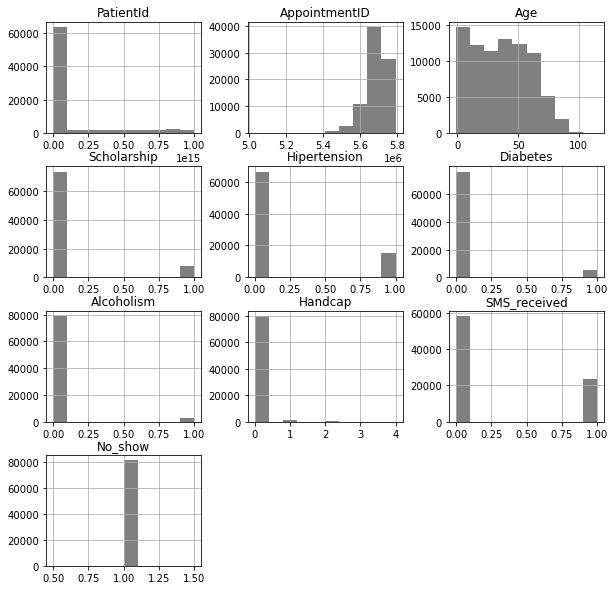

In [67]:
df.hist(figsize=(10,10), color='grey');

The histograms above showing histograms of the all the records after cleaning


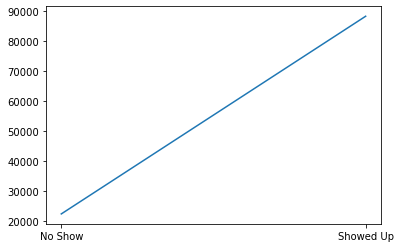

In [83]:
locations = [1, 2]
labels = ['No Show', 'Showed Up']
heights = [df_Noshow.shape[0], df.shape[0]-df_Noshow.shape[0]]
plt.plot(labels, heights); 
plt.show()

In [87]:
 df['SMS_received'].value_counts()

0    58171
1    23476
Name: SMS_received, dtype: int64

In [86]:
df['No_show'].value_counts()

1    81647
Name: No_show, dtype: int64

In [68]:
SMS_total = df.query('SMS_received=="1"').count()['SMS_received']
SMS_noshow = df_noshow.query('SMS_received=="1"').count()['SMS_received']
SMS_showedup = SMS_total - SMS_noshow
total_records = 110527

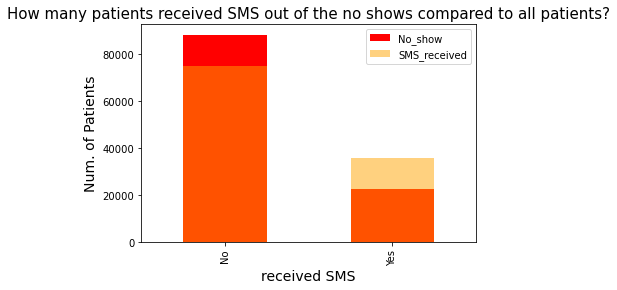

In [84]:
df.No_show.value_counts().plot(kind='bar', color='red', alpha=1)
df.SMS_received.value_counts().plot(kind='bar', color='Orange', alpha=.5)

plt.xlabel("received SMS", fontsize=14)
plt.ylabel("Num. of Patients", fontsize=14)
plt.title('How many patients received SMS out of the no shows compared to all patients?', fontsize=15)
plt.xticks([0, 1], labels=['No', 'Yes'])
plt.legend();
plt.show()



Showing how many patients received text messages overall vs. how many didn't, as well as how many patients who didn't show up received text messages. (Orange indicates total SMS received, whereas red indicates no-show SMS received.) Only 32% of all appointments got messages, and only 8% of those that received messages did not show up.

### Research Question 2 ( Does the gender play a role in the no-show appointments?)

In [181]:
Data = df['Gender'].value_counts()
Data

F    71837
M    38685
Name: Gender, dtype: int64

There are around 70,000 female patients at the hospital. 
There are less than 40,000 male patients in the hospital. 
There are almost twice as many female patients as there are male patients.

In [139]:
df.query('Gender=="F"').count()['Age']
df.query('Gender=="M"').count()['Age'] 

df_Noshow.query('Gender=="F"').count()['Age'] 
df_Noshow.query('Gender=="M"').count()['Age']

dataf= FNoshow = (14594 / 71840) * 100
datam= MNoshow = (7725 / 38687) * 100

print(FNoshow, MNoshow)

20.31458797327394 19.967947889471915


In [191]:
def PlotBars(label1, height1, label2, height2, col1='r', col2='b', Title='', yLabel='No_show %', xLabel='Gender'):
    sns.set()
    fig, ax = plt.subplots()
    ax.bar(label1, height1, label=label1, color=col1,)
    ax.bar(label2, height2, label=label2, color=col2,)
    ax.set_title(Title, fontweight='bold',)
    ax.set_ylabel(yLabel)
    ax.set_xlabel(xLabel)
    ax.legend()

SUMMERY: Function to plot 2 bars in one chart. 
              First one  => has height = height1  ... label = label1 ... color = col1 default red.
              Second one => has height = height2  ... label = label2 ... color = col2 default blue.
    """

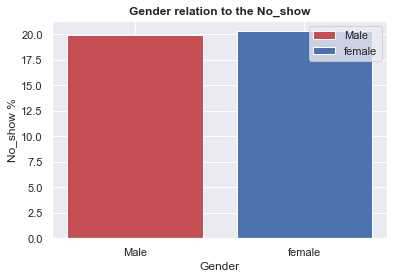

In [192]:
PlotBars(label1='Male', height1=MNoshow, label2='female', height2=FNoshow, Title='Gender relation to the No_show', xLabel='Gender')

This chart the difference between male and female no shows is so minor, gender has no bearing on whether or not the patient will show up for the appointment.

# research question 3 ( Do the months influence schedule for appointments ) 

now i am Extracting the month from the appointment date column to check for higher seasons for the No show

In [72]:
df_Noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
df_Noshow['Month'] = df_Noshow['AppointmentDay'].dt.month
df_Noshow['Month'] = df_Noshow['Month'].apply(lambda x: calendar.month_abbr[x])
df_Noshow.Month.unique()

/var/folders/x_/l7xmwms93qx83q5cczvc_qdc0000gn/T/ipykernel_27900/1557457321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
/var/folders/x_/l7xmwms93qx83q5cczvc_qdc0000gn/T/ipykernel_27900/1557457321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Noshow['Month'] = df_Noshow['AppointmentDay'].dt.month
/var/folders/x_/l7xmwms93qx83q5cczvc_qdc0000gn/T/ipykernel_27900/1557457321.py:4: SettingWithCopyWarning: 
A value is trying

array(['Apr', 'May', 'Jun'], dtype=object)

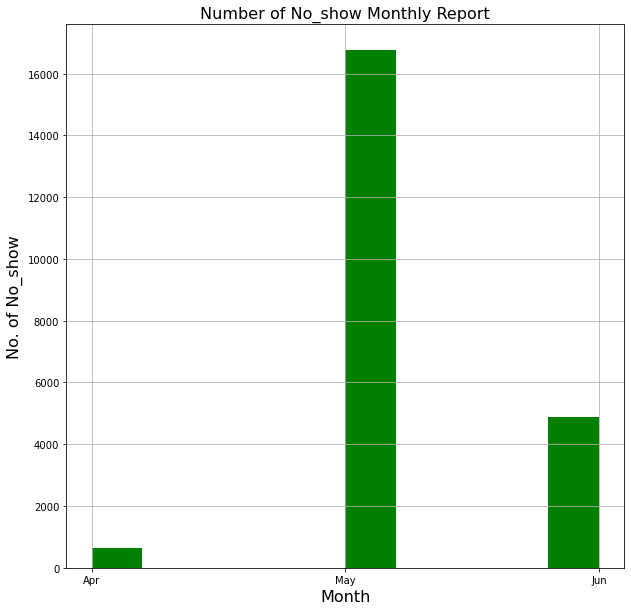

In [88]:
df_Noshow['Month'].hist(color='green', figsize=(10,10))
plt.xlabel("Month", fontsize=16)
plt.ylabel("No. of No_show", fontsize=16)
plt.title("Number of No_show Monthly Report", fontsize=16);
plt.show()

May had the largest number of no shows, which is a significant difference from other months, especially given that the information only includes appointments for three months.

# Research Question 4: Distribution of Age for the No-shows?

In [75]:
df_Noshow.Age.value_counts()

0      639
1      415
17     396
19     393
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64

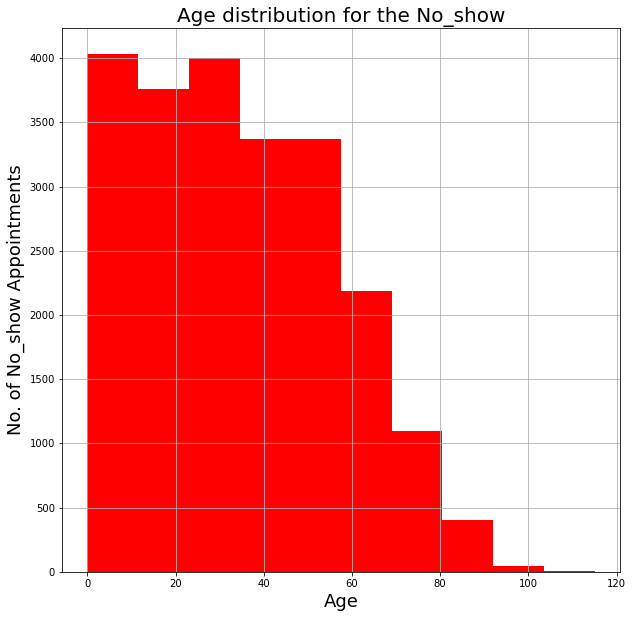

In [87]:
df_Noshow.hist(column='Age', figsize=(10,10), color='red')
plt.title("Age distribution for the No_show", fontsize=20)
plt.xlabel("Age", fontsize=18)
plt.ylabel('No. of No_show Appointments', fontsize=18);
plt.show()

The data is heavily biased to the right, indicating that the majority of no shows are among children and adults, with seniors being the most likely to show up.

<a id='conclusions'></a>
## Conclusions

Here are the results of the preliminary research, taking into account the constraints of the procedures performed:

Out of the total of 110522 appointment records provided in the dataset, and after some cleaning, 22273 didn't show up for their appointments.

Showing how many patients received text messages overall vs. how many didn't, as well as how many patients who didn't show up received text messages. (Orange indicates total SMS received, whereas red indicates no-show SMS received.) Only 32% of all appointments received messages, and only 8% of those that received messages did not show up.

Due to the large number of same-day appointment reservations that did not make it to the doctor's appointment (1792), a notice interval between the scheduling day and the appointment day may make a beneficial difference.

older individuals are more likely to show up for their appointments.
Patients are more likely to not show up during the month of May

Women register for appointments at a higher rate than males, yet the percentage of no-shows is nearly the same in both genders.

Attributes that affects the No-show column:  Age, SMS_Received, month of the Appointment and length between the scheduling date and the appointment date.

one limitation i had with this dataset was changing the colums for fit the approprite names, it was didifult understanding what each heading meant, but over time i was able to clean it and carry out my analysis. Still, based purely on a connection, the research does not indicate or infer that one alteration caused another.

In [8]:
from subprocess import call
call(['python', '-html', 'nbconvert', 'Investigate_a_Dataset.ipynb'])



usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Options and arguments (and corresponding environment variables):
-b     : issue warnings about str(bytes_instance), str(bytearray_instance)
         and comparing bytes/bytearray with str. (-bb: issue errors)
-B     : don't write .pyc files on import; also PYTHONDONTWRITEBYTECODE=x
-c cmd : program passed in as string (terminates option list)
-d     : turn on parser debugging output (for experts only, only works on
         debug builds); also PYTHONDEBUG=x
-E     : ignore PYTHON* environment variables (such as PYTHONPATH)
-h     : print this help message and exit (also --help)
-i     : inspect interactively after running script; forces a prompt even
         if stdin does not appear to be a terminal; also PYTHONINSPECT=x
-I     : isolate Python from the user's environment (implies -E and -s)
-m mod : run library module as a script (terminates option list)
-O     : remove assert and __debug__-dependent statements; add .o

0

pt-1 before
         .pyc extension; also PYTHONOPTIMIZE=x
-OO    : do -O changes and also discard docstrings; add .opt-2 before
         .pyc extension
-q     : don't print version and copyright messages on interactive startup
-s     : don't add user site directory to sys.path; also PYTHONNOUSERSITE
-S     : don't imply 'import site' on initialization
-u     : force the stdout and stderr streams to be unbuffered;
         this option has no effect on stdin; also PYTHONUNBUFFERED=x
-v     : verbose (trace import statements); also PYTHONVERBOSE=x
         can be supplied multiple times to increase verbosity
-V     : print the Python version number and exit (also --version)
         when given twice, print more information about the build
-W arg : warning control; arg is action:message:category:module:lineno
         also PYTHONWARNINGS=arg
-x     : skip first line of source, allowing use of non-Unix forms of #!cmd
-X opt : set implementation-specific option. The following options are av